In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("all_seasons.csv")

In [4]:
df.head() #Predicting Rebounds

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [6]:
df.describe()

,Unnamed: 0,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000
mean,5572.000000,27.168686,200.812818,100.637868,52.005832,8.126487,3.560036,1.801463,-2.153899,0.055593,0.141772,0.185599,0.508099,0.131078
std,3217.428709,4.344164,9.190973,12.576295,25.069495,5.935482,2.495394,1.789940,12.150611,0.043889,0.063194,0.053047,0.098879,0.095017
min,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2786.000000,24.000000,195.580000,90.718400,32.000000,3.500000,1.800000,0.600000,-6.300000,0.022000,0.096000,0.150000,0.478000,0.065000
50%,5572.000000,27.000000,200.660000,99.790240,58.000000,6.600000,3.000000,1.200000,-1.300000,0.043000,0.132000,0.182000,0.521000,0.102000
75%,8358.000000,30.000000,208.280000,109.315672,74.000000,11.500000,4.700000,2.400000,3.200000,0.086000,0.182000,0.218000,0.557000,0.178000
max,11144.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


In [30]:
sns.set_palette("RdYlBu")
sns.set_style('whitegrid')

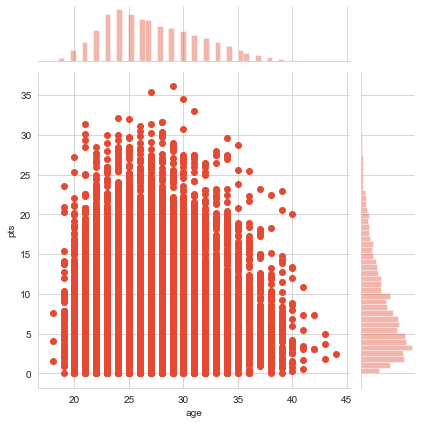

In [31]:
sns.jointplot(x='age',y='pts',data=df)
#Players are in their prime at 26 - 29#

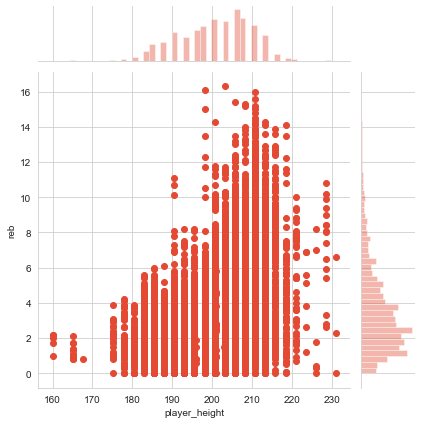

In [37]:
sns.jointplot(x='player_height',y='reb',data=df) #Taller players grabbed more rebounds

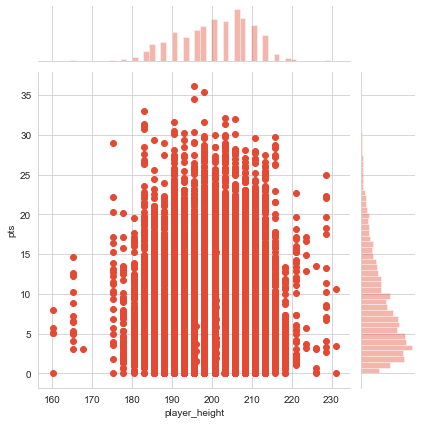

In [38]:
sns.jointplot(x='player_height',y='pts',data=df) #Players with height 6'4 to 6'6 scored the most points
#Shooting guards scored most points

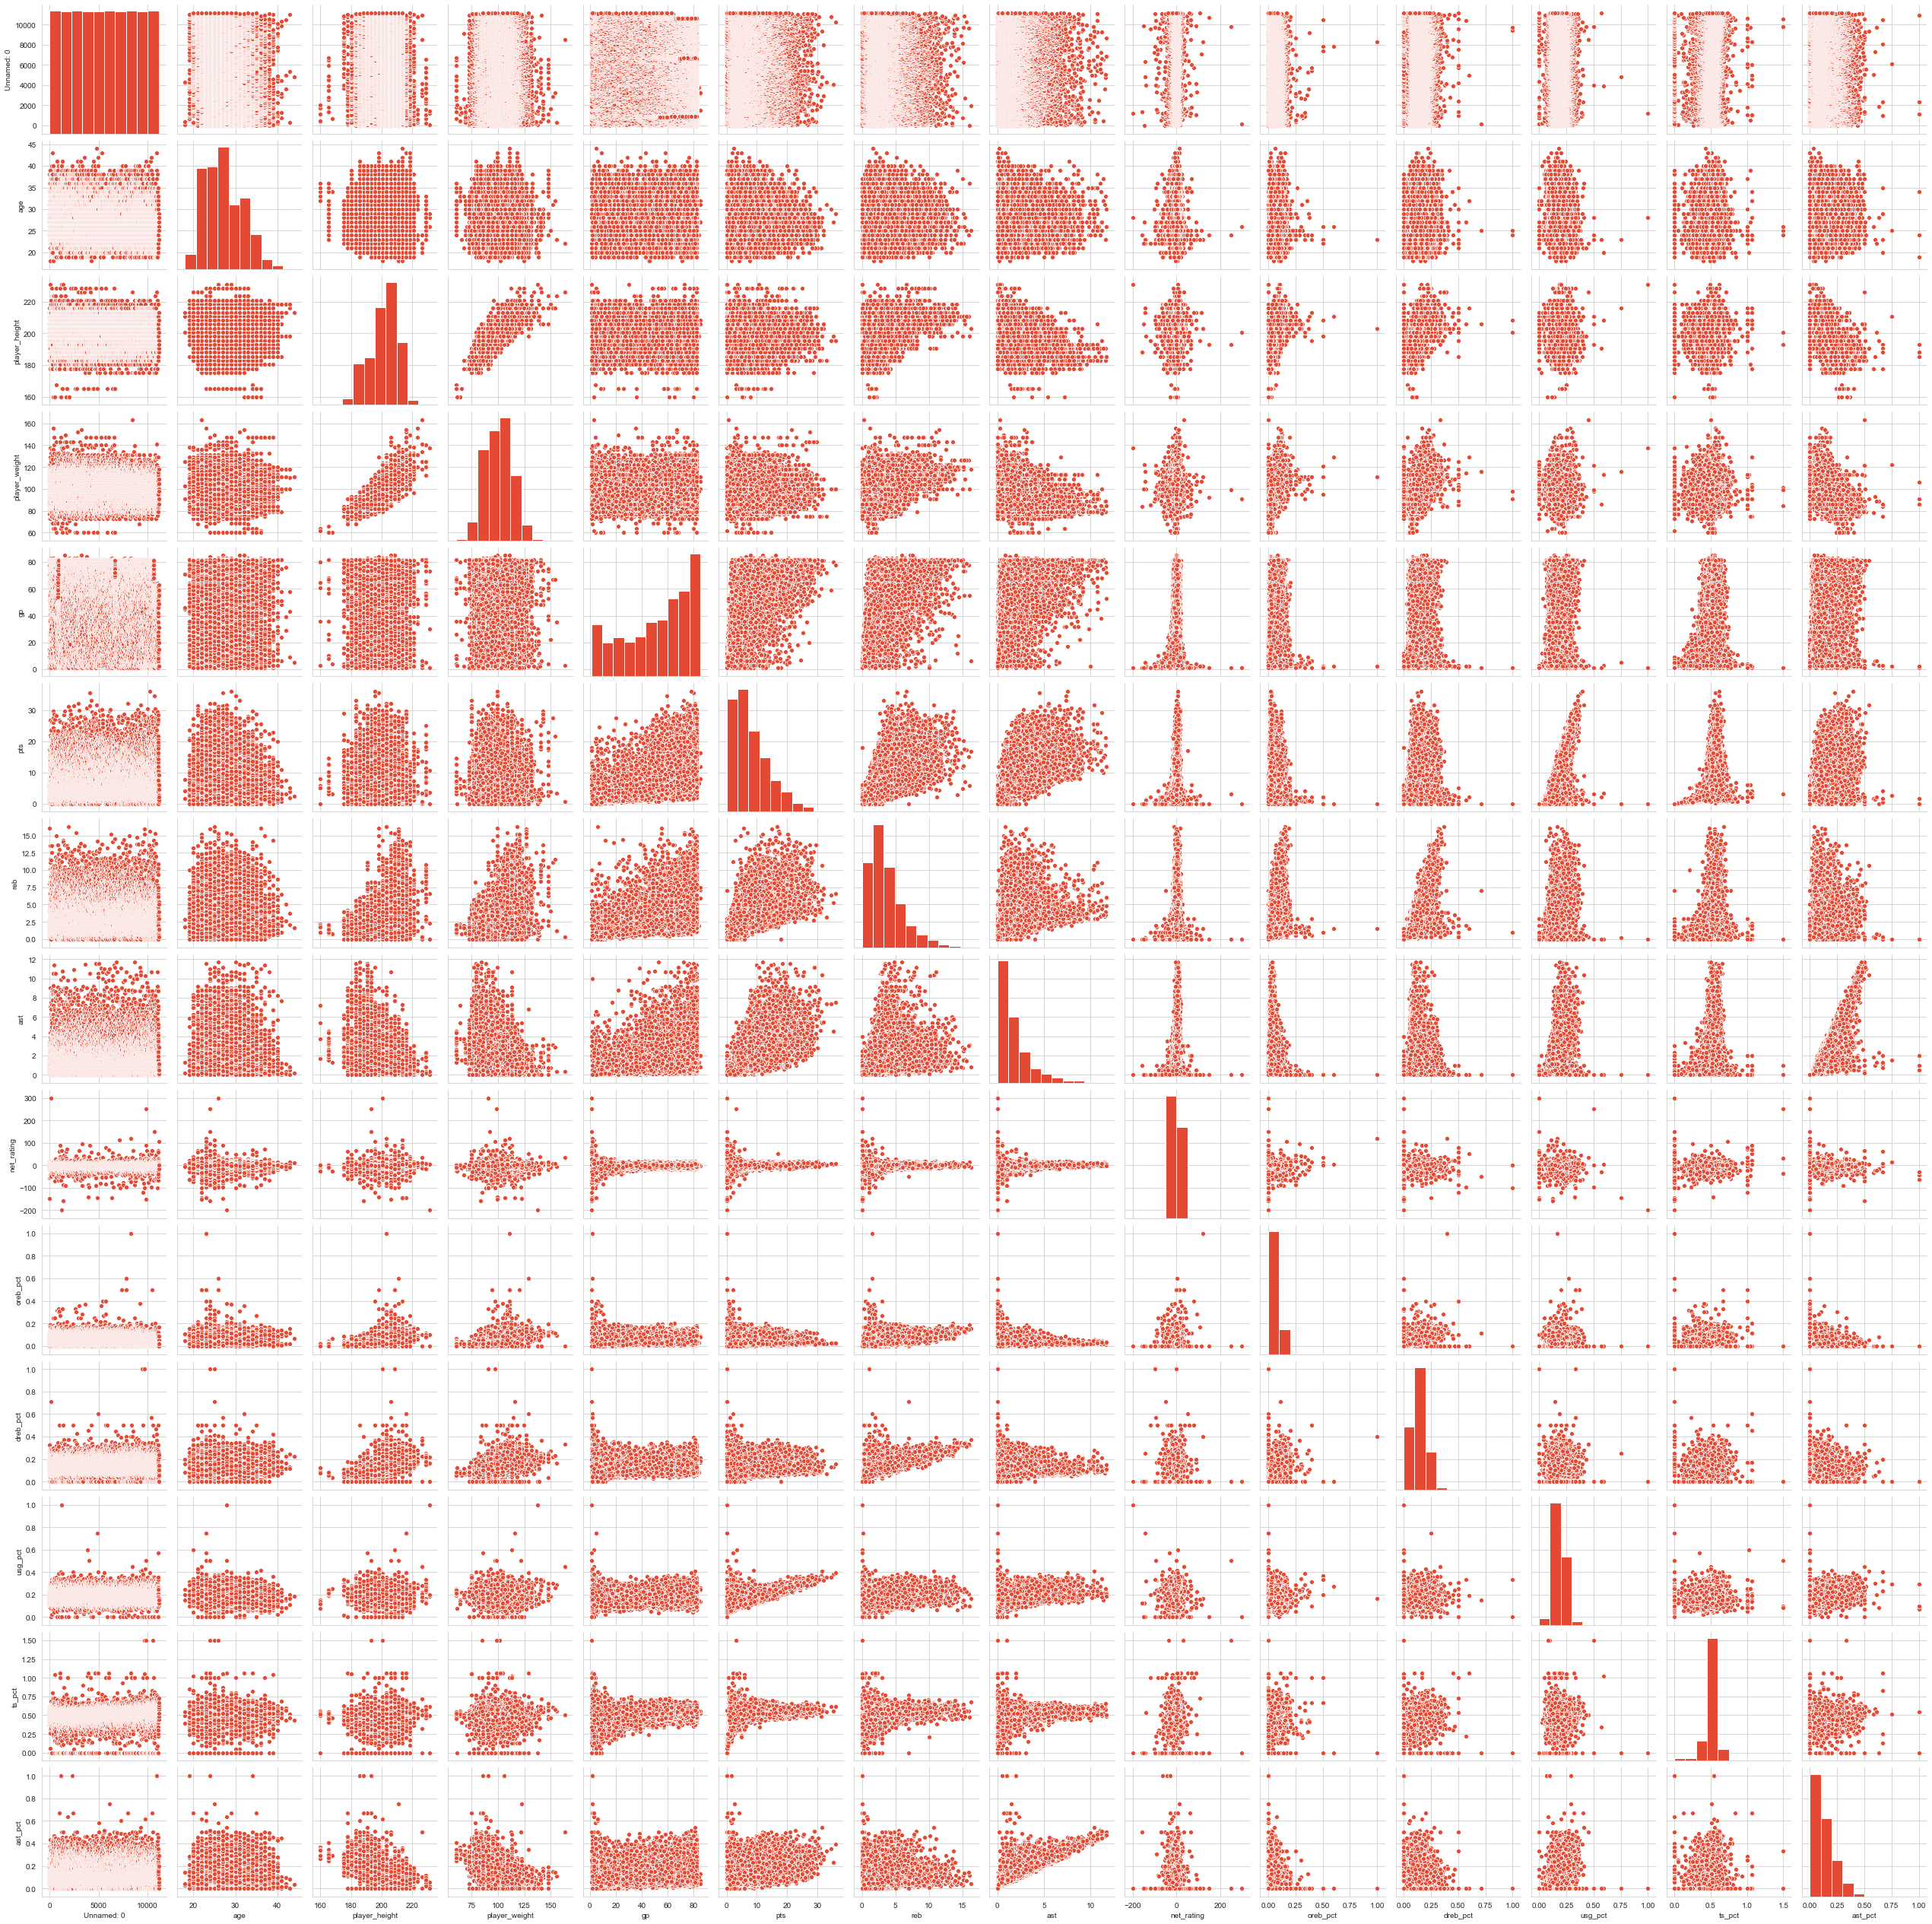

In [39]:
sns.pairplot(df)

In [159]:
X = df[['age', 'player_height','player_weight', 'pts','ast']]

In [168]:
y = df['reb'] #Trying to predict the rebounds based off of the age, height, weight, pts, and asts of the player

In [169]:
from sklearn.model_selection import train_test_split

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [171]:
from sklearn.linear_model import LinearRegression

In [172]:
lm = LinearRegression()

In [173]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [174]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

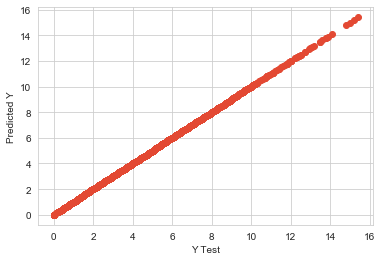

In [175]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [176]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.88764275109536e-15
MSE: 5.964639737616354e-30
RMSE: 2.442261193569671e-15
